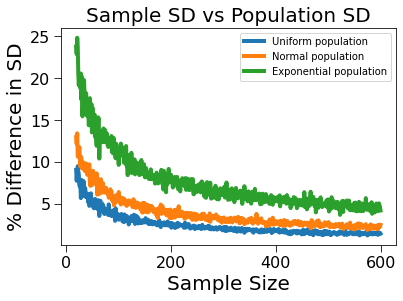

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 19 11:45:20 2016

@author: johnguttag
"""

import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1


def makeHist(data, title, xlabel, ylabel, bins = 20):
    pylab.hist(data, bins = bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)

def getHighs():
    inFile = open('temperatures.csv')
    population = []
    for l in inFile:
        try:
            tempC = float(l.split(',')[1])
            population.append(tempC)
        except:
            continue
    return population

def getMeansAndSDs(population, sample, verbose = False):
    popMean = sum(population)/len(population)
    sampleMean = sum(sample)/len(sample)
    if verbose:
        makeHist(population,
                 'Daily High 1961-2015, Population\n' +\
                 '(mean = '  + str(round(popMean, 2)) + ')',
                 'Degrees C', 'Number Days')
        pylab.figure()
        makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean, 2)) + ')',
                 'Degrees C', 'Number Days')   
        print('Population mean =', popMean)
        print('Standard deviation of population =',
              numpy.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =',
              numpy.std(sample))
    return popMean, sampleMean,\
           numpy.std(population), numpy.std(sample)

def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5
    
#sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
#numTrials = 50
#population = getHighs()
#popSD = numpy.std(population)
#sems = []
#sampleSDs = []
#for size in sampleSizes:
#    sems.append(sem(popSD, size))
#    means = []
#    for t in range(numTrials):
#        sample = random.sample(population, size)
#        means.append(sum(sample)/len(sample))
#    sampleSDs.append(numpy.std(means))
#pylab.plot(sampleSizes, sampleSDs,
#           label = 'Std of 50 means')
#pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
#pylab.title('SEM vs. SD for 50 Means')
#pylab.legend()
           
def getDiffs(population, sampleSizes):
    popStd = numpy.std(population)
    diffsFracs = []
    for sampleSize in sampleSizes:
        diffs = []
        for t in range(100):
            sample = random.sample(population, sampleSize)
            diffs.append(abs(popStd - numpy.std(sample)))
        diffMean = sum(diffs)/len(diffs)
        diffsFracs.append(diffMean/popStd)
    return pylab.array(diffsFracs)*100
    
def plotDiffs(sampleSizes, diffs, title, label):
    pylab.plot(sampleSizes, diffs, label = label)
    pylab.xlabel('Sample Size')
    pylab.ylabel('% Difference in SD')
    pylab.title(title)
    pylab.legend()

#sampleSizes = range(20, 600, 1)
#diffs = getDiffs(getHighs(), sampleSizes)
#plotDiffs(sampleSizes, diffs,
#          'Sample SD vs Population SD, Temperatures',
#          label = 'High temps')

def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
    pylab.figure()
    makeHist(normal, 'Gaussian', 'Value', 'Frequency')
    pylab.figure()
    makeHist(exp, 'Exponential', 'Value', 'Frequency')

#plotDistributions()

def compareDists():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    sampleSizes = range(20, 600, 1)
    udiffs = getDiffs(uniform, sampleSizes)
    ndiffs = getDiffs(normal, sampleSizes)
    ediffs = getDiffs(exp, sampleSizes)
    plotDiffs(sampleSizes, udiffs,
              'Sample SD vs Population SD',
              'Uniform population')
    plotDiffs(sampleSizes, ndiffs,
              'Sample SD vs Population SD',
              'Normal population')
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD',
              'Exponential population')

compareDists()  
#
#popSizes = (10000, 100000, 1000000)
#sampleSizes = range(20, 600, 1)
#for size in popSizes:
#    population = []
#    for i in range(size):
#        population.append(random.expovariate(0.5))
#    ediffs = getDiffs(population, sampleSizes)
#    plotDiffs(sampleSizes, ediffs,
#              'Sample SD vs Population SD, Uniform',
#              'Population size = ' + str(size))
